The main business objective of telecommunication companies is to retain customers, as acquiring new customers is very costly and time consuming. For this reason, large telecom corporations are seeking to implement ML algorithms to help then to spot the customers most likely to change and reduce churn rates.

In this article we’ll go through an end-to-end workflow, where we’ll start by (1) exploratory data analysis to (2) feature engineering and we end up with (3) modeling and evaluation.

The data set used in this project is available in Kaggle is an adaptation of the original IBM data. The target indicates if the customer has left the company in the last month or not and the other features are about its characteristics (demographic information, account information, and services information).

In [1]:
# standard
import pandas as pd
import numpy as np
import math

# Plots
import matplotlib.pyplot as plt

# data set path
data_path = "C:/Users/Sadek/Documents/GitHub/Project/telecom-customer-churn/data/"

# 1. Load and inspect data

In [2]:
# import telecom data set into a pandas data frame
df_telecom = pd.read_csv(data_path+"WA_Fn-UseC_-Telco-Customer-Churn.csv")

# visualize column names
df_telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# check number of features
print(f"Number of features: {len(df_telecom.columns) - 2}\n")
# check unique values of each column
for column in df_telecom.columns:
    print(f"Column: {column} - Unique values: {df_telecom[column].unique()}")

Number of features: 19

Column: customerID - Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique values: ['Female' 'Male']
Column: SeniorCitizen - Unique values: [0 1]
Column: Partner - Unique values: ['Yes' 'No']
Column: Dependents - Unique values: ['No' 'Yes']
Column: tenure - Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique values: ['No' 'Yes']
Column: MultipleLines - Unique values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique values: ['No' 'Yes' 'No internet serv

As showen above, the dataset contains **19 independent variables**, which can be classified into 3 groups.

#### (1) Demographic Information

* `gender`: Whether the client is a female or a male (`Female`, `Male`).
* `SeniorCitizen`: Indicates if the customer is 65 or older (`0`, `1`).
* `Partner`: Whether the client has a partner (married) or not (`Yes`, `No`).
* `Dependents`: Whether the client has dependents or not (`Yes`, `No`).

#### (2) Customer Account Information

* `tenure`: Number of months the customer has stayed with the company (`Multiple different numeric values`).
* `Contract`: Indicates the customer’s current contract type (`Month-to-Month`, `One year`, `Two year`).
* `PaperlessBilling`: Whether the client has paperless billing or not (`Yes`, `No`).
* `PaymentMethod`: The customer’s payment method (`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit Card (automatic)`).
* `MontlyCharges`: The amount charged to the customer monthly (`Multiple different numeric values`).
* `TotalCharges`: The total amount charged to the customer (`Multiple different numeric values`).

#### (3) Services Information

* `PhoneService`: Whether the client has a phone service or not (`Yes`, `No`).
* `MultipleLines`: Whether the client has multiple lines or not (`No phone service`, `No`, `Yes`).
* `InternetServices`: Whether the client is subscribed to Internet service with the company (`DSL`, `Fiber`, `optic`, `No`)
* `OnlineSecurity`: Whether the client has online security or not (`No internet service`, `No`, `Yes`).
* `OnlineBackup`: Whether the client has online backup or not (`No internet service`, `No`, `Yes`).
* `DeviceProtection`: Whether the client has device protection or not (`No internet service`, `No`, `Yes`).
* `TechSupport`: Whether the client has tech support or not (`No internet service`, `No`, `Yes`).
* `StreamingTV`: Whether the client has streaming TV or not (`No internet service`, `No`, `Yes`).
* `StreamingMovies`: Whether the client has streaming movies or not (`No internet service`, `No`, `Yes`).

# 2. Data cleaning

## 2.1. Missing values and data types

In [4]:
# summary of the data frame
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The majority of features are categorical (object) and only few numeric, but one categorical feature doesn’t look right, the `TotalCharges` has the type of object instead of numeric.\
`TotalCharges` is converted from Object to float64, the same of `MonthlyCharges` feature.

In [5]:
df_telecom["TotalCharges"] = pd.to_numeric(df_telecom["TotalCharges"], errors="coerce")
print(f"The feature TotalCharges is type {df_telecom.TotalCharges.dtype} now!")

The feature TotalCharges is type float64 now!


By default, this function raises an exception when it sees non-numeric data; however, we can use the argument `errors='coerce'` to skip those cases and replace them with a `NaN`. \
Therefore, we need to check again if this transformation will create null values.

In [6]:
# check null observation of TotalCharges columns
df_telecom[df_telecom["TotalCharges"].isnull()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


These observations have also a Tenure of 0, therefore we will remove those observations from the data set.

In [7]:
# drop observation with null values
df_telecom.dropna(inplace=True)

## 2.2. Remove `customerID` column

The `customerID` needs to be droped because it's useless to explain whether a customer will churn.

In [8]:
# drop customerID from the data set
df_telecom.drop(columns="customerID", inplace=True)

# 3. Data visualization

## 3.1. Target distribution

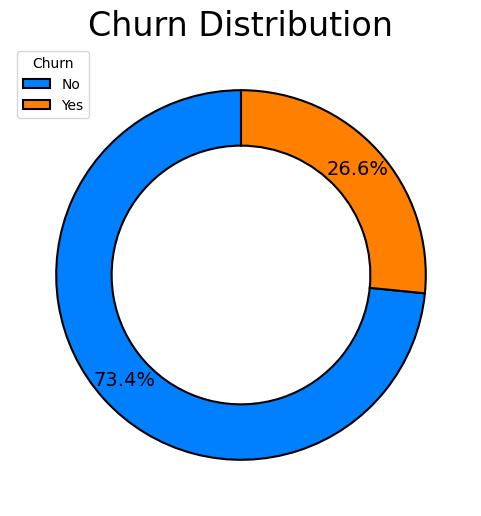

In [9]:
# https://towardsdatascience.com/basics-of-donut-charts-with-pythons-matplotlib-100cf71b259d
# https://sharkcoder.com/data-visualization/mpl-pie-charts
def pie_plot(df, target, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    labels = df_telecom[target].unique()
    wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':1.5}
    ax.pie(
        df_telecom[target].value_counts(normalize=True),
        wedgeprops=wedgeprops,
        startangle=90,
        colors=['#0080ff', '#ff8000'],
    #     labels=labels,
        autopct='%1.1f%%',
        textprops={'fontsize': 14},
        pctdistance=0.85
          )

    plt.title(title, fontsize=24, loc='center')
    plt.legend(title=target, labels=labels)
    plt.show()
    
pie_plot(df_telecom, "Churn", "Churn Distribution")

The above plot shows the percentage of observations that correspond to each class of the response variable. \
As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, `26.6%` of the clients have churned, and small occurences of a label could lead to bad predictor.
It's possible to choose some ways to work with this case:

* Make a random over-sampling, duplicating some samples of the minority class until this reach a balance, but this could lead to an overfitted model.
* Make a random down-sampling, removing some samples from the majority class until this reach a balance, but this leads to information loss and not feeding the model with the collected samples.
* Make a random down-sampling, removing some samples from the majority class until this reach a balance, but this leads to information loss and not feeding the model with the collected samples.
* Another resampling technique, as SMOTE.

Choosing a metric that deals with imbalanced datasets, like F1 Score. \
The Churn problem is about client retention, so is worth to check about false positives, so precision and recall metrics are a must for this situtation. \
F1 Score is used to check the quality of the model predictions, as the metric is an harmonic mean of precision and recall.

## 3.2. Demographic Information

The following section we'll analyze the percentage of `Churn` respectively for each demographic category.

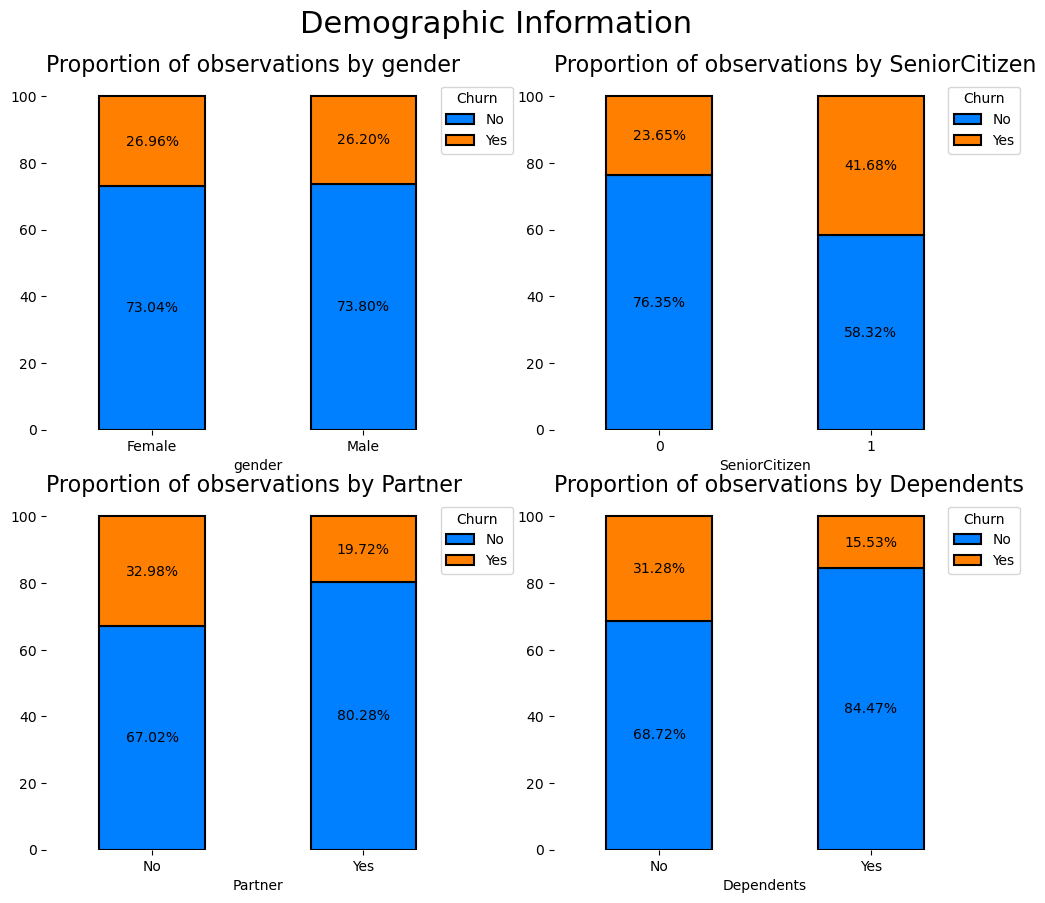

In [13]:
def percentage_stacked_plot(df, columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    df: Data frame
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['#0080ff', '#ff8000'], edgecolor='black', lw=1.5)
        # add annotations
        for c in ax.containers:
            # set the bar label
            ax.bar_label(c, fmt='%.2f%%',label_type='center')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(df_telecom, demographic_columns, 'Demographic Information')

As shown above, each subgraph (stacked bar) describes a categorical variable and its proportion with respect to the target. We can draw the following conclusion:
* We do not expect gender to have significant predictive power, because there’s a negligible difference in customer count when changing the service provider. Both genders behave the same when it comes to migrating to another service.
* The churn rate for seniors is almost double that of the younger citizens.
* Customers with partner churn less than customers with no partner.
* Independent customers have a higher churn rate than dependent customers.